# 1.3.3: World Population: Proportional Growth

<br>

---

*Modeling and Simulation in Python*

Copyright 2021 Allen Downey, (License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/))

Revised, Mike Augspurger (2021-present)

<br>

---

First, we need to import the world population data.  Run this cell:

In [ ]:
# @title
# Import Pandas and give it the shorthand name "pd"
import pandas as pd

# Define the file we want to import
address = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
file_loc = 'Images_and_Data/Data/World_pop_data.xlsx'

# Import the world population data
data = pd.read_excel(address + file_loc, header=0,index_col=0)
census = data.US_census
un = data.UN

# Create fitted curve
t_0 = census.index[0]
t_end = census.index[-1]
p_0 = census[t_0]

## Proportional Growth Model

In the previous notebook we simulated a model of world population with
constant growth. Our first stab at a model was not great, but with some iteration in the exercises we brought our average relative error down to about 2%.  Should we stop there?

<br>

<center>
<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/1_3/question.PNG width = 300>
</center>

 <br>

It's tempting, but there's more to understanding data than just fitting the curve.  If you think about the nature of population, a couple things might be bothering you:

* According to a constant growth model, world population would keep growing at the same rate forever, and that does not seem reasonable.  Even more, the model suggests that this rate of growth would be the same even if the population were tiny.  Somethings not quite right...

* There is no obvious mechanism that would cause population growth to be constant from year to year. Changes in population are determined by the fraction of people who die and the fraction of people who give birth, so we expect them to depend on the current population.

As you can see, fitting a curve to data can be a first step understanding data, but it doesn't really *explain* what is happening in the system.  As we iterate, let's look for a model that might both fit the data better and make more explanatory sense.

### Birth and death rates

The biggest problem with the constant growth model is that it doesn't
make any sense.

<br>

<center>
<img src = https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Images/1_3/problem.PNG width = 400>
</center>

<br>

It makes more sense to think of growth and decline in terms of *rates*: some percentage of the population will give birth each year, and a different percentage will die.  

<br>

When we run the simulation, for each time step, we woill use the parameter `birth_rate` to compute the number of births, and `death_rate` to compute the number of deaths.


<br>

While `annual_growth` and `shift_constant` were the key parameters for the linear model, `birth_rate` and `death_rate` will be the key parameters here, and we'll need to find the values that best fit the data.  For the death rate, I'll use 7.7 deaths per 1000 people, which was roughly the global death rate in 2020.

<br>

What about the birth rate?  Start with a thought experiment: If both the birth and death rates were 7.7 births per 1000 people, what would happen to the population?  But the population is growing, so we know the birth rate needs to be higher than 7.7. We'll start with 8.0, and rerun the model until it fits the data as closely as possible:


In [ ]:
death_rate = 7.7/1000  # per 1000 people
birth_rate = 8.0/1000

Now we'll run a simulation that is very similar to our linear simulation, except that we're changing the way we add to the population for each time step.  Notice that we have already assigned values for the `t_0` and `t_end` in the first cell of the notebook:

In [ ]:
# Increase population by using a rate
results = pd.Series([],dtype=object)
results.name = 'Population'
results.index.name = 'Year'
results[t_0] = census[t_0]

for t in range(t_0, t_end):
    # Define the number of births and deaths in the current year
    births = birth_rate * results[t]
    deaths = death_rate * results[t]
    # Add and subtract births and deaths to find the new population
    results[t+1] = results[t] + births - deaths

Now let's take a look at our results:

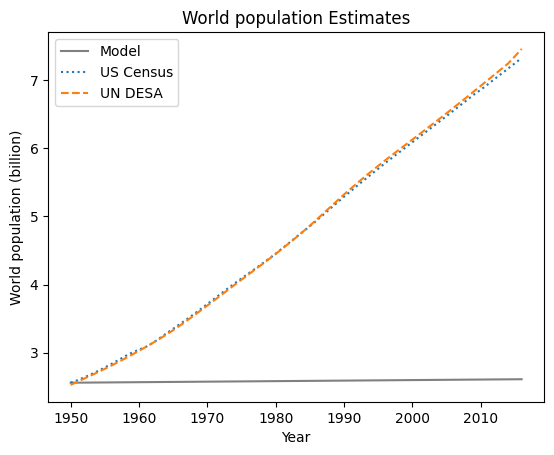

In [ ]:
results.plot(color='gray', label='Model',title='Proportional Growth Model',
            legend=True)
census.plot(style=':', label='US Census',legend=True)
un.plot(style='--', label='UN DESA',xlabel='Year',
             ylabel='World population (billion)',
            title='World population Estimates',
           legend=True);

Our model shows the population effectively staying the same: clearly the birth rate needs to be higher than 8.0!  Change the birth rate above and find a value that best fits the known data.

---

<br>

🟨 🟨

In [ ]:
from urllib.request import urlretrieve

location = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/'
folder = 'Support_files/'
name = 'Embedded_Qs.ipynb'
local, _ = urlretrieve(location + folder + name, name)
%run /content/$name

#@title {form-width: "50%", display-mode: "form" }
home = 'https://github.com/MAugspurger/ModSimPy_MAugs/raw/main/Images_and_Data/Embedded_Qs/'
data = display_Quant('1_3_world_pop',home,5)
answer = None #@param {type:"number"}
check_Quant(data,answer)

What is 40.1 times 3?



---

Depending on the birth rate we choose, we can get the model to fit the data in the first part of the time period, or we can get the model to match the current population, but doing both doesn't work. Overall,
the *quality of fit* is not as good as the constant growth model,
which is surprising, because it seems like the proportional model is
more realistic.

<br>

We're going to have to keep iterating...

---

<br>

## Exercises

---

<br>

🟨 🟨

### Exercise 1

You might have noticed the math in our simulation above is overly complicated:

```
births = birth_rate * results[t]
deaths = death_rate * results[t]
results[t+1] = results[t] + births - deaths
```
Mathematically, we've set the annual growth by adding a term that looks like this:

<br>

$$(A * X) - (B * X)$$

<br>

We could simplify this by combining $A$ and $B$ into a single term:

<br>

$$(A-B) * X)$$

<br>

In other words, instead of two parameters, `birth_rate` and `death_rate`, we can write the change function in terms of a single "growth rate" parameter that represents the difference between the birth and death rate.  The conventional name for a growth rate in a proportional model is $\alpha$,  or `alpha`.

<br>

For an exercise, modify the code below so to use a single parameter `alpha` instead of `death_rate` and `birth_rate`:

In [ ]:
# Adapt this code to use the alpha parameter
death_rate = 7.7/1000  # per 1000 people
birth_rate = 8.0/1000

# Increase population by using a rate
results = pd.Series([],dtype=object)
results.name = 'Population'
results.index.name = 'Year'
results[t_0] = census[t_0]

for t in range(t_0, t_end):
    # Define the number of births and deaths in the current year
    births = birth_rate * results[t]
    deaths = death_rate * results[t]
    # Add and subtract births and deaths to find the new population
    results[t+1] = results[t] + births - deaths

In [ ]:
# Plot your results to check that your code functions correctly
# (No need to change anything in this cell)
results.plot(color='gray', label='Model',title='Proportional Growth Model',
            legend=True)
census.plot(style=':', label='US Census',legend=True)
un.plot(style='--', label='UN DESA',xlabel='Year',
             ylabel='World population (billion)',
            title='World population Estimates',
           legend=True);